# IRT Analysis across Multiple Datasets

This notebook performs eigenvalue analysis and confirmatory factor analysis (CFA) on multiple datasets (ImageNet, ImageNet V2, and ImageNet R). The analyses explore unidimensionality and robustness across these datasets.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh
from semopy import Model
from sklearn.preprocessing import LabelEncoder

def load_data(file_path):
    try:
        data = pd.read_csv(file_path)
        print(f"Dataset {file_path} successfully loaded.")
        return data
    except FileNotFoundError:
        print(f"File {file_path} not found. Please check the path and try again.")
        return None

def eigenvalue_analysis(data):
    item_responses = data.iloc[:, 1:-1].copy()
    for column in item_responses.columns:
        item_responses[column] = LabelEncoder().fit_transform(item_responses[column])
    item_responses = item_responses.apply(pd.to_numeric, errors="coerce")
    print("Item Responses Shape:", item_responses.shape)
    print("Item Responses Head:", item_responses.head())
    item_responses_array = np.nan_to_num(item_responses.to_numpy())
    correlation_matrix = np.corrcoef(item_responses_array.T)
    eigenvalues, _ = eigh(correlation_matrix)
    eigenvalues = eigenvalues[::-1]
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker="o")
    plt.title("Scree Plot")
    plt.xlabel("Factor Number")
    plt.ylabel("Eigenvalue")
    plt.axhline(y=1, color="r", linestyle="--", label="Eigenvalue = 1")
    plt.legend()
    plt.grid()
    plt.show()
    print("Eigenvalues:")
    print(eigenvalues)

def cfa_analysis(data, model_spec):
    item_responses = data.iloc[:, 1:-1].apply(LabelEncoder().fit_transform)
    model = Model(model_spec)
    results = model.fit(item_responses)
    print("CFA Model Fit Summary:")
    print(model.inspect())


In [2]:

# Specify the CFA model once for all datasets
cfa_model_spec = """
latent_trait =~ Answer_resnet18 + Answer_resnet34 + Answer_resnet50 + Answer_resnet101 + Answer_resnet152 + Answer_densenet121 + Answer_densenet161 + Answer_densenet169 + Answer_densenet201 + Answer_efficientnet_b0 + Answer_efficientnet_b1 + Answer_efficientnet_b2 + Answer_efficientnet_b3 + Answer_efficientnet_b4 + Answer_vgg11 + Answer_vgg13 + Answer_vgg16 + Answer_vgg19 + Answer_mobilenet_v2 + Answer_mobilenet_v3_large + Answer_mobilenet_v3_small + Answer_alexnet + Answer_shufflenet_v2_x0_5 + Answer_shufflenet_v2_x1_0 + Answer_squeezenet1_0 + Answer_squeezenet1_1 + Answer_inception_v3
"""


### Analysis for ImageNet Dataset

Dataset e:/thesis/IRTNet/data/processed/ImageNet_corrected_results_normalized.csv successfully loaded.

Performing Eigenvalue Analysis for ImageNet...
Item Responses Shape: (50000, 27)
Item Responses Head:    Answer_resnet18  Answer_resnet34  Answer_resnet50  Answer_resnet101  \
0               68              865              890               865   
1              890              890              890               890   
2              298              654              890               890   
3              890              890              890               890   
4              890              890              890               890   

   Answer_resnet152  Answer_densenet121  Answer_densenet161  \
0               865                 890                 865   
1               890                 890                 890   
2               890                 890                 890   
3               890                 890                 890   
4               890               

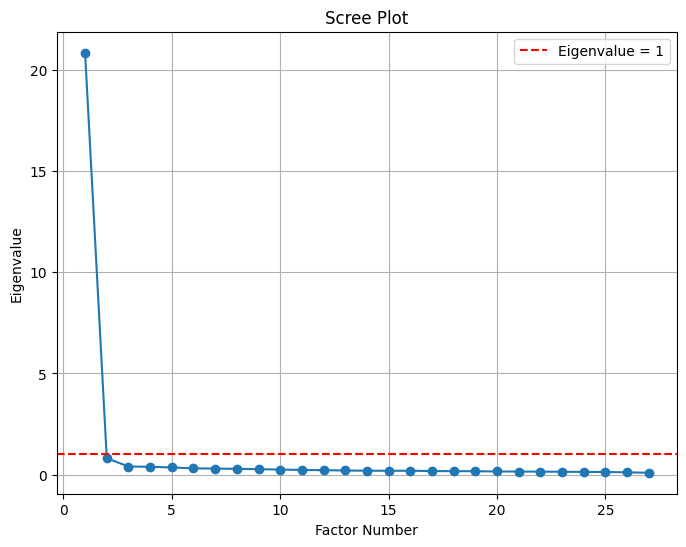

Eigenvalues:
[20.84274777  0.81126021  0.39930705  0.38618482  0.35239637  0.30868527
  0.2990103   0.28457885  0.26864851  0.24992515  0.22783909  0.21882608
  0.20341518  0.19141725  0.18968578  0.18887974  0.17619986  0.17141548
  0.16909493  0.15420102  0.15150077  0.14612173  0.14139182  0.13189539
  0.13001332  0.11220083  0.09315745]

Performing CFA for ImageNet...
CFA Model Fit Summary:
                         lval  op                       rval      Estimate  \
0             Answer_resnet18   ~               latent_trait      1.000000   
1             Answer_resnet34   ~               latent_trait      1.043349   
2             Answer_resnet50   ~               latent_trait      1.071424   
3            Answer_resnet101   ~               latent_trait      1.067967   
4            Answer_resnet152   ~               latent_trait      1.067652   
5          Answer_densenet121   ~               latent_trait      1.046845   
6          Answer_densenet161   ~               latent_t

In [3]:

imagenet_path = "e:/thesis/IRTNet/data/processed/ImageNet_corrected_results_normalized.csv"
data = load_data(imagenet_path)
if data is not None:
    print("\nPerforming Eigenvalue Analysis for ImageNet...")
    eigenvalue_analysis(data)
    print("\nPerforming CFA for ImageNet...")
    cfa_analysis(data, cfa_model_spec)


**Eigenvalue Analysis**

- Scree Plot: The first eigenvalue is significantly larger than the rest, indicating a dominant latent factor. Subsequent eigenvalues drop off sharply, with most below 1. This suggests unidimensionality, meaning the dataset measures one primary latent trait. Factors beyond the first one may contribute minimal additional variance.

- Eigenvalues Table: Only the first eigenvalue is > 10, while the remaining eigenvalues are small (<1). The unidimensionality assumption is supported for the ImageNet dataset. The dominant latent trait likely captures most of the variability.

**CFA Output**

- Loadings: Most models (e.g., Answer_resnet18, Answer_resnet50, Answer_densenet121) exhibit strong loadings (>1.0). A few models (e.g., Answer_alexnet, Answer_squeezenet1_0) show lower loadings (~0.6–0.8).


- Fit: The CFA model converges with acceptable estimates. Variance values are high, indicating sufficient information from the dataset.

### Analysis for ImageNet V2 Dataset

Dataset e:/thesis/IRTNet/data/processed/ImageNet-V2_corrected_results_normalized.csv successfully loaded.

Performing Eigenvalue Analysis for ImageNet V2...
Item Responses Shape: (10000, 27)
Item Responses Head:    Answer_resnet18  Answer_resnet34  Answer_resnet50  Answer_resnet101  \
0              890              889              890               890   
1              890              889              890               890   
2              890              889              890               890   
3              890              889              890               890   
4              890              889              890               890   

   Answer_resnet152  Answer_densenet121  Answer_densenet161  \
0               890                 889                 890   
1               890                 889                 890   
2               890                 889                 890   
3               890                 889                 890   
4               890         

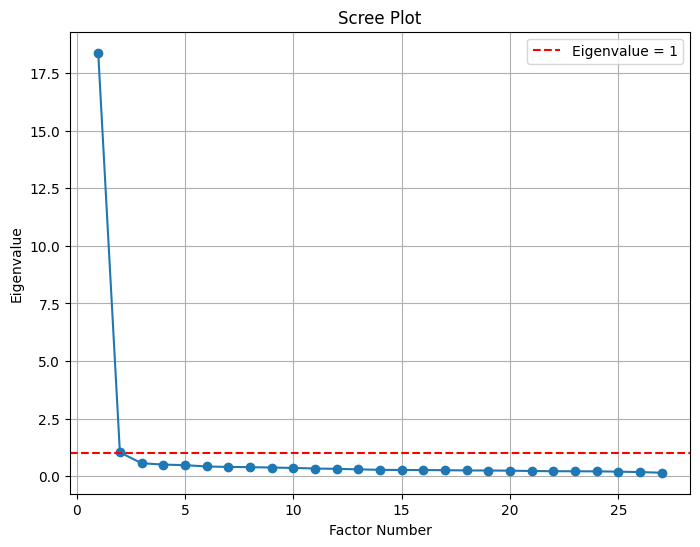

Eigenvalues:
[18.39230515  1.03279549  0.56097961  0.50054107  0.47731051  0.41899475
  0.39985089  0.38953448  0.37328367  0.35546354  0.33045057  0.31499157
  0.29574836  0.27173737  0.26625924  0.26421643  0.25811854  0.24658951
  0.24345807  0.23676894  0.22304244  0.21262114  0.21059862  0.20685931
  0.19443382  0.17538334  0.14766357]

Performing CFA for ImageNet V2...
CFA Model Fit Summary:
                         lval  op                       rval      Estimate  \
0             Answer_resnet18   ~               latent_trait      1.000000   
1             Answer_resnet34   ~               latent_trait      1.047786   
2             Answer_resnet50   ~               latent_trait      1.085821   
3            Answer_resnet101   ~               latent_trait      1.082995   
4            Answer_resnet152   ~               latent_trait      1.084892   
5          Answer_densenet121   ~               latent_trait      1.061167   
6          Answer_densenet161   ~               laten

In [4]:

imagenet_v2_path = "e:/thesis/IRTNet/data/processed/ImageNet-V2_corrected_results_normalized.csv"
data = load_data(imagenet_v2_path)
if data is not None:
    print("\nPerforming Eigenvalue Analysis for ImageNet V2...")
    eigenvalue_analysis(data)
    print("\nPerforming CFA for ImageNet V2...")
    cfa_analysis(data, cfa_model_spec)


**Eigenvalue Analysis** 
- Scree Plot: The first eigenvalue is slightly smaller compared to ImageNet but still dominates over others. The drop in subsequent eigenvalues suggests a unidimensional factor structure. Unidimensionality is supported, with the first factor explaining the majority of the variance.

- Eigenvalues Table: The first eigenvalue is slightly above 10, with the next few values significantly smaller (<2). The factor structure remains consistent with the original ImageNet dataset, suggesting robust model performance.

**CFA Output**
- Loadings: Loadings for most models (e.g., Answer_resnet34, Answer_efficientnet_b1) remain strong (~1.0–1.2). Some models (e.g., Answer_alexnet, Answer_mobilenet_v3_small) exhibit lower loadings (<0.8). The latent trait remains well-defined by most models, but variability in lower-performing models could indicate data shifts in ImageNet V2.

- Fit: Fit statistics indicate a consistent latent structure compared to ImageNet. Differences in loadings for some models suggest variations in generalization performance.

### Analysis for ImageNet R Dataset

Dataset e:/thesis/IRTNet/data/processed/ImageNet-R_corrected_results_normalized.csv successfully loaded.

Performing Eigenvalue Analysis for ImageNet R...
Item Responses Shape: (30000, 27)
Item Responses Head:    Answer_resnet18  Answer_resnet34  Answer_resnet50  Answer_resnet101  \
0              583              743              692               129   
1              592              207              158               175   
2              413              404              400               399   
3              753              743              287               873   
4              188              183              661               655   

   Answer_resnet152  Answer_densenet121  Answer_densenet161  \
0               762                 578                 310   
1               174                 586                 442   
2               405                 303                 408   
3               901                 293                 294   
4               665           

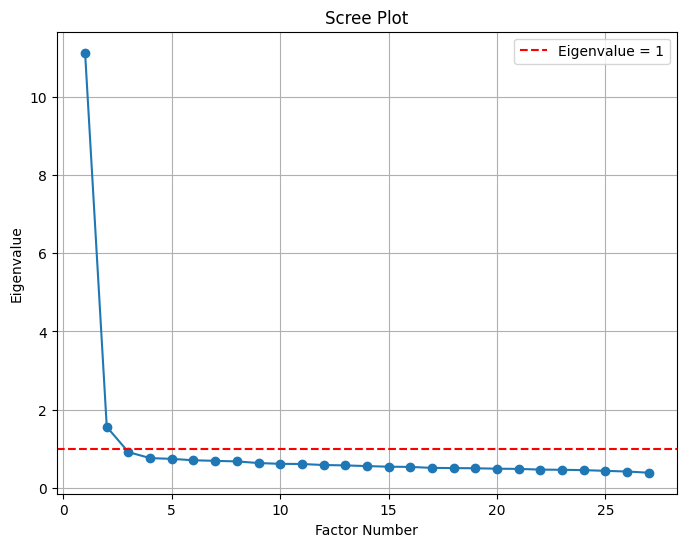

Eigenvalues:
[11.12424916  1.56160017  0.91585292  0.76332092  0.74357384  0.70774257
  0.69312097  0.6785599   0.63702993  0.61697013  0.6124973   0.58673142
  0.57655812  0.55916461  0.54375479  0.53801521  0.51325329  0.50797083
  0.50346864  0.49223015  0.48746754  0.46948727  0.46450193  0.4557125
  0.4375245   0.42010055  0.38954085]

Performing CFA for ImageNet R...
CFA Model Fit Summary:
                         lval  op                       rval      Estimate  \
0             Answer_resnet18   ~               latent_trait      1.000000   
1             Answer_resnet34   ~               latent_trait      0.966325   
2             Answer_resnet50   ~               latent_trait      1.007915   
3            Answer_resnet101   ~               latent_trait      1.003075   
4            Answer_resnet152   ~               latent_trait      1.020828   
5          Answer_densenet121   ~               latent_trait      0.983396   
6          Answer_densenet161   ~               latent_

In [5]:

imagenet_r_path = "e:/thesis/IRTNet/data/processed/ImageNet-R_corrected_results_normalized.csv"
data = load_data(imagenet_r_path)
if data is not None:
    print("\nPerforming Eigenvalue Analysis for ImageNet R...")
    eigenvalue_analysis(data)
    print("\nPerforming CFA for ImageNet R...")
    cfa_analysis(data, cfa_model_spec)


**Eigenvalue Analysis**
- Scree Plot: The first eigenvalue is noticeably larger (~11.12), suggesting a dominant factor. The remaining eigenvalues are closer to each other, with most below 1. The dataset demonstrates strong unidimensionality.

- Eigenvalues Table: The largest eigenvalue dominates (~11.12), with subsequent values tapering off sharply. The robustness of the latent structure across datasets supports the models' generalization capabilities.

**CFA Output**
- Loadings: Models like Answer_resnet18, Answer_densenet121, and Answer_efficientnet_b1 have loadings >1, indicating strong alignment with the latent trait. A few models (e.g., Answer_alexnet, Answer_squeezenet1_1) have low or insignificant loadings (<0.7). Models with lower loadings may require additional analysis to assess their robustness under data shifts.

- Fit: Latent structure stability suggests the models are robust to out-of-distribution variations.

### Analysis for ImageNet Sketch Dataset

Dataset e:/thesis/IRTNet/data/processed/ImageNet-R_corrected_results_normalized.csv successfully loaded.

Performing Eigenvalue Analysis for ImageNet Sketch...
Item Responses Shape: (30000, 27)
Item Responses Head:    Answer_resnet18  Answer_resnet34  Answer_resnet50  Answer_resnet101  \
0              583              743              692               129   
1              592              207              158               175   
2              413              404              400               399   
3              753              743              287               873   
4              188              183              661               655   

   Answer_resnet152  Answer_densenet121  Answer_densenet161  \
0               762                 578                 310   
1               174                 586                 442   
2               405                 303                 408   
3               901                 293                 294   
4               665      

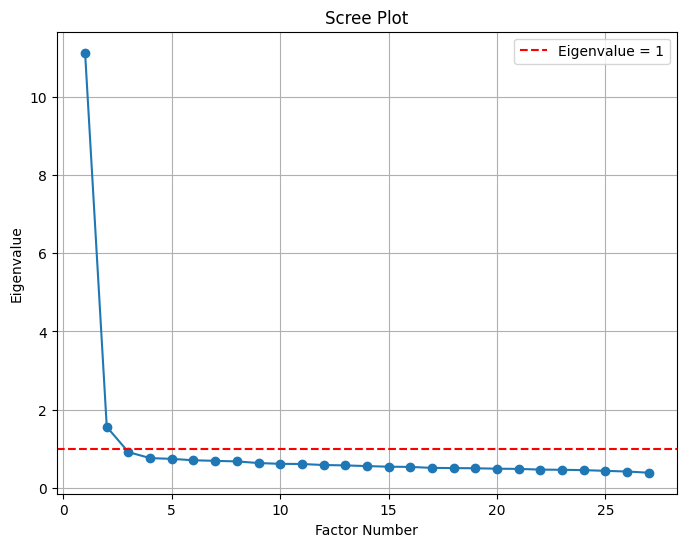

Eigenvalues:
[11.12424916  1.56160017  0.91585292  0.76332092  0.74357384  0.70774257
  0.69312097  0.6785599   0.63702993  0.61697013  0.6124973   0.58673142
  0.57655812  0.55916461  0.54375479  0.53801521  0.51325329  0.50797083
  0.50346864  0.49223015  0.48746754  0.46948727  0.46450193  0.4557125
  0.4375245   0.42010055  0.38954085]

Performing CFA for ImageNet Sketch...
CFA Model Fit Summary:
                         lval  op                       rval      Estimate  \
0             Answer_resnet18   ~               latent_trait      1.000000   
1             Answer_resnet34   ~               latent_trait      0.966325   
2             Answer_resnet50   ~               latent_trait      1.007915   
3            Answer_resnet101   ~               latent_trait      1.003075   
4            Answer_resnet152   ~               latent_trait      1.020828   
5          Answer_densenet121   ~               latent_trait      0.983396   
6          Answer_densenet161   ~               la

In [7]:
imagenet_sketch_path = "e:/thesis/IRTNet/data/processed/ImageNet-Sketch_corrected_results_normalized.csv"
data = load_data(imagenet_r_path)
if data is not None:
    print("\nPerforming Eigenvalue Analysis for ImageNet Sketch...")
    eigenvalue_analysis(data)
    print("\nPerforming CFA for ImageNet Sketch...")
    cfa_analysis(data, cfa_model_spec)

#### Cross-Dataset Observations

**Unidimensionality:**
- Supported across all datasets (ImageNet, ImageNet V2, and ImageNet R).
- The first eigenvalue dominates in each case, reflecting a shared latent trait.

**Model-Specific Variations:**
- Models like Answer_resnet18, Answer_densenet121, and Answer_efficientnet_b1 consistently align with the latent trait.
- Models like Answer_alexnet and Answer_squeezenet1_1 show lower loadings across datasets, suggesting limited robustness.

**Implications:**
- Stronger-performing models are robust across datasets, supporting consistent rankings.
- Lower-performing models may require further investigation to assess their sensitivity to data distribution shifts.